In [77]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
mpl.rcParams['figure.figsize'] = [13, 8]

In [78]:
df21 = pd.read_csv('2021(Completed).csv')
df21 = df21.rename(columns={'Lang':'lang','Gender':'gender'})
df20 = pd.read_csv('2020(Completed).csv')

In [79]:
df21.head()

,date,song,singer,streams,url_list,Company,Duration,gender,lang
0,2021-12-31--2022-01-07,記憶棉,MC 張天賦,434327,https://open.spotify.com/track/1ZrnCyms7CBYsCv...,Warner Music Hong Kong Ltd.,273,M,Can
1,2021-12-31--2022-01-07,反對無效,MC 張天賦,342240,https://open.spotify.com/track/2P5Eeh29qJrYa1T...,Warner Music Hong Kong Ltd.,228,M,Can
2,2021-12-31--2022-01-07,時候不早,MC 張天賦,306681,https://open.spotify.com/track/433FK3gktWwmjkA...,Warner Music Hong Kong Ltd.,220,M,Can
3,2021-12-31--2022-01-07,"如果可以 - 電影""月老""主題曲",WeiBird,215619,https://open.spotify.com/track/72OVnXDzugvrCU2...,Sony Music Entertainment Taiwan Ltd.,274,M,Man
4,2021-12-31--2022-01-07,"Dear My Friend,",Keung To,201078,https://open.spotify.com/track/11IqNbLOD4s4nVY...,Nation Records Co. Ltd.,232,M,Can


In [80]:
df20.tail()

,date,song,singer,streams,url_list,Company,Duration,gender,lang
10595,2019-12-27--2020-01-03,Attention,Charlie Puth,"20,796",https://open.spotify.com/track/5cF0dROlMOK5uNZ...,"Artist Partner Group, Inc. for the United Stat...",208,Eng,Eng
10596,2019-12-27--2020-01-03,boyfriend (with Social House),Ariana Grande,"20,777",https://open.spotify.com/track/0Ryd8975WihbObp...,"SRV LabelCo, LLC and Republic Records, a divis...",186,F,Eng
10597,2019-12-27--2020-01-03,最後晚餐,Supper Moment,"20,640",https://open.spotify.com/track/0Jm0goItLKozRDZ...,Redline Music Limited,333,G,Can
10598,2019-12-27--2020-01-03,Let Me Down Slowly,Alec Benjamin,"20,584",https://open.spotify.com/track/2qxmye6gAegTMjL...,NaN,169,Eng,Eng
10599,2019-12-27--2020-01-03,痛愛,Joey Yung,"20,545",https://open.spotify.com/track/0StuO1Spn9uXwcn...,英皇娛樂 (Emperor Entertainment Group),213,F,Can


In [81]:
top20_2021 = df21.groupby('song').streams.sum().sort_values(ascending=False).head(20)
df20.streams = df20.streams.apply(lambda x: x.replace(",","")).astype('int64')
top20_2020 = df20.groupby('song').streams.sum().sort_values(ascending=False).head()

Text(0.5, 1.0, 'Total streams trend by language 2020-2021')

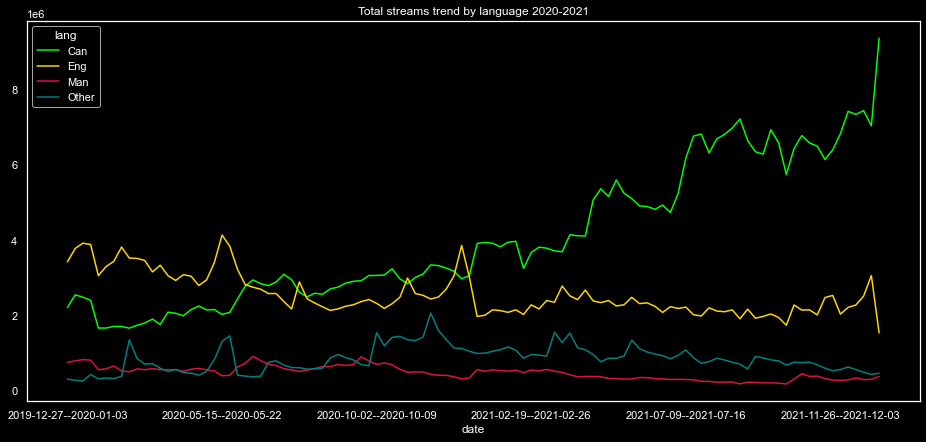

In [82]:
#combine df21 and df20
df = pd.concat([df21,df20])#, keys=['2021', '2020'])
df = df.reset_index()
df = df.drop('index',axis=1)
plt.style.use('dark_background')
streams = df.groupby(['date','lang']).streams.sum().unstack().plot(kind='line',figsize=(16,7), grid=False, color=['lime','gold','crimson','teal'],linewidth=1.5)
plt.title('Total streams trend by language 2020-2021')

In [99]:
df21.streams.sum()/df20.streams.sum()

1.3142652991285975

In [106]:
df21.groupby('lang').streams.sum()#/df20.groupby('lang').streams.sum()

lang
Can      295420433
Eng      117168441
Man       18445522
Other     46436476
Name: streams, dtype: int64

In [111]:
can21 = df21[df21['lang']=='Can']
com21 = can21.groupby('Company')['streams'].sum().sort_values(ascending=False)
com21.head(10)

Company
 Nation Records Co. Ltd.         53888803
Warner Music Hong Kong Ltd.      48100709
Terence Lam Production & Co.     31638161
Universal Music Ltd.             30057643
Music Nation Records Co. Ltd.    16023577
Media Asia Music Ltd.            15713177
EEG Music                        11347824
Daymaker Creatives Limited        6028486
 Nation Records Co Ltd.           5196231
Cinepoly Records Co. Ltd.         4535583
Name: streams, dtype: int64

In [86]:
can20 = df20[df20['lang']=='Can']
com20 = can20.groupby('Company')['streams'].sum().sort_values(ascending=False)
com20.head(10)

Company
Warner Music Hong Kong Ltd.                             17782796
Universal Music Ltd.                                    13217513
The Voice Entertainment Group Limited                    7666284
Cinepoly Records Co. Ltd.                                7040326
英皇娛樂 (Emperor Entertainment Group)                       6799053
Amusic                                                   6266694
Terence Lam Production & Co.                             5815661
EEG Music                                                5551694
Gold Typhoon Hong Kong, a Warner Music Group company     5119303
Strawberry Fields Ltd.                                   4603571
Name: streams, dtype: int64

<AxesSubplot:ylabel='Company'>

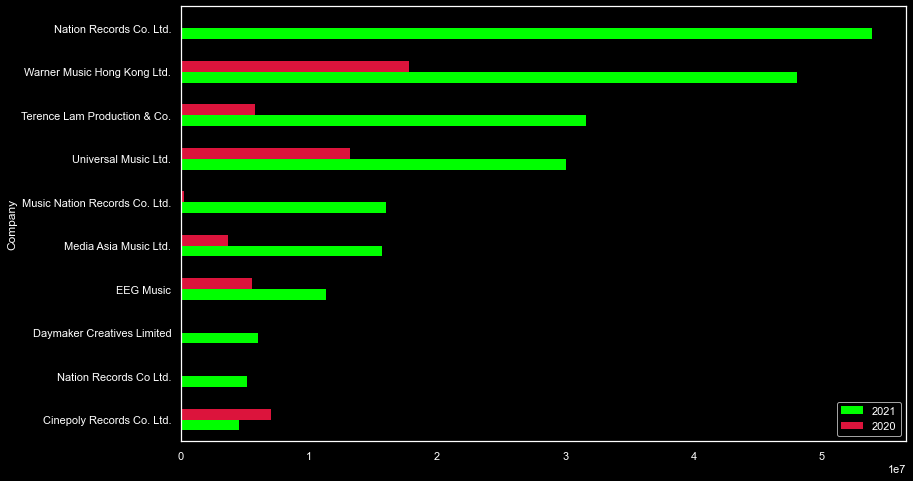

In [87]:
com = pd.concat([com21,com20],axis=1, join='outer')
com.columns = ['2021','2020']
com_top10 = com.sort_values('2021',ascending=False).head(10)
com_top10.sort_values('2021').plot(kind='barh',grid=False,color=['lime','crimson'],edgecolor = "none")

In [88]:
can21.singer.nunique()/can20.singer.nunique()
#no. of Can singers showed 45% growth vs 2020, a healthy trend to further expand the Canto market

1.4536082474226804

In [89]:
can21.groupby('singer').streams.sum().sort_values(ascending=False)

singer
Terence Lam    31638161
Dear Jane      21988050
陳卓賢 Ian        15470508
Jer 柳應廷        13238839
Edan 呂爵安       12974668
                 ...   
Kelly Chen        21852
ANSONBEAN         21491
胡學軒               21228
HANA              20457
戴祖儀               20215
Name: streams, Length: 141, dtype: int64

In [90]:
can20.groupby('singer').streams.sum().sort_values(ascending=False)

singer
Dear Jane       13536077
Eason Chan       8965995
Hins Cheung      7348183
Eric Chou        5942903
Terence Lam      5815661
                  ...   
Nicholas Tse       21106
Jer 柳應廷            20720
Edmond Leung       20333
Hacken Lee         19218
TomFatKi           18914
Name: streams, Length: 97, dtype: int64

In [91]:
df21.reset_index()
df21['rank']=(df21.index+1)%200
df21['rank']= df21['rank'].apply(lambda r: 200 if r == 0 else r)
df21

,date,song,singer,streams,url_list,Company,Duration,gender,lang,rank
0,2021-12-31--2022-01-07,記憶棉,MC 張天賦,434327,https://open.spotify.com/track/1ZrnCyms7CBYsCv...,Warner Music Hong Kong Ltd.,273,M,Can,1
1,2021-12-31--2022-01-07,反對無效,MC 張天賦,342240,https://open.spotify.com/track/2P5Eeh29qJrYa1T...,Warner Music Hong Kong Ltd.,228,M,Can,2
2,2021-12-31--2022-01-07,時候不早,MC 張天賦,306681,https://open.spotify.com/track/433FK3gktWwmjkA...,Warner Music Hong Kong Ltd.,220,M,Can,3
3,2021-12-31--2022-01-07,"如果可以 - 電影""月老""主題曲",WeiBird,215619,https://open.spotify.com/track/72OVnXDzugvrCU2...,Sony Music Entertainment Taiwan Ltd.,274,M,Man,4
4,2021-12-31--2022-01-07,"Dear My Friend,",Keung To,201078,https://open.spotify.com/track/11IqNbLOD4s4nVY...,Nation Records Co. Ltd.,232,M,Can,5
...,...,...,...,...,...,...,...,...,...,...
10595,2021-01-01--2021-01-08,あの夢をなぞって,YOASOBI,19571,https://open.spotify.com/track/5ptl2PXkiSth54H...,YOASOBI,240,G,Other,196
10596,2021-01-01--2021-01-08,AYA,MAMAMOO,19529,https://open.spotify.com/track/4BZXVFYCb76Q0Kl...,"RBW Inc.,under license to Kakao M Corp.",211,G,Other,197
10597,2021-01-01--2021-01-08,See You Next Time,AGA,19484,https://open.spotify.com/track/0y0l2x1hEwQ8d6Y...,Universal Music Ltd.,257,F,Can,198
10598,2021-01-01--2021-01-08,DDU-DU DDU-DU,BLACKPINK,19408,https://open.spotify.com/track/2aI2k39nfa3KFsa...,"YG Entertainment, distributed through Intersco...",211,G,Other,199


rank
1     215538
2     177796
3     162281
4     148036
5     140066
6     133333
7     127109
8     120273
9     115470
10    110650
11    106017
12    101299
13     97898
14     95032
15     92775
16     90105
17     87872
18     86005
19     83717
20     82078
21     80559
22     79066
23     77764
24     76451
25     74933
26     73571
27     72509
28     71580
29     70760
30     69752
Name: streams, dtype: int64


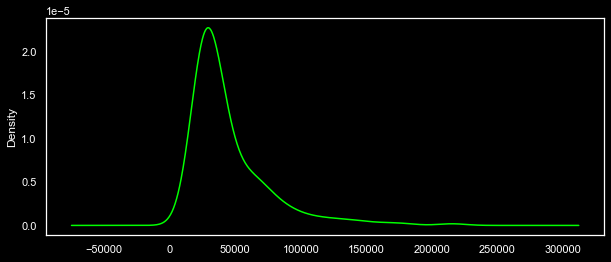

In [92]:
df21.groupby('rank').streams.mean().plot.kde(grid=False,figsize=(10,4),color='lime')
print(df21.groupby('rank').streams.mean().head(30).astype('int64'))

In [93]:
(com21/can21.streams.sum()*100).head(10)

Company
 Nation Records Co. Ltd.         18.241393
Warner Music Hong Kong Ltd.      16.282120
Terence Lam Production & Co.     10.709537
Universal Music Ltd.             10.174531
Music Nation Records Co. Ltd.     5.423991
Media Asia Music Ltd.             5.318920
EEG Music                         3.841245
Daymaker Creatives Limited        2.040646
 Nation Records Co Ltd.           1.758927
Cinepoly Records Co. Ltd.         1.535298
Name: streams, dtype: float64

In [96]:
df20[df20['date']=='2019-12-27--2020-01-03']

,date,song,singer,streams,url_list,Company,Duration,gender,lang
10400,2019-12-27--2020-01-03,Psycho,Red Velvet,122647,https://open.spotify.com/track/3CYH422oy1cZNoo...,SM Entertainment,210,G,Other
10401,2019-12-27--2020-01-03,Señorita,"Shawn Mendes, Camila Cabello",113316,https://open.spotify.com/track/6v3KW9xbzN5yKLt...,"Island Records, a division of UMG Recordings, ...",190,G,Eng
10402,2019-12-27--2020-01-03,Memories,Maroon 5,103584,https://open.spotify.com/track/2b8fOow8UzyDFAE...,Interscope Records (222 Records),189,G,Eng
10403,2019-12-27--2020-01-03,Dance Monkey,Tones And I,90995,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,Bad Batch Records,209,F,Eng
10404,2019-12-27--2020-01-03,ROXANNE,Arizona Zervas,88064,https://open.spotify.com/track/696DnlkuDOXcMAn...,Arizona Zervas,163,Eng,Eng
...,...,...,...,...,...,...,...,...,...
10595,2019-12-27--2020-01-03,Attention,Charlie Puth,20796,https://open.spotify.com/track/5cF0dROlMOK5uNZ...,"Artist Partner Group, Inc. for the United Stat...",208,Eng,Eng
10596,2019-12-27--2020-01-03,boyfriend (with Social House),Ariana Grande,20777,https://open.spotify.com/track/0Ryd8975WihbObp...,"SRV LabelCo, LLC and Republic Records, a divis...",186,F,Eng
10597,2019-12-27--2020-01-03,最後晚餐,Supper Moment,20640,https://open.spotify.com/track/0Jm0goItLKozRDZ...,Redline Music Limited,333,G,Can
10598,2019-12-27--2020-01-03,Let Me Down Slowly,Alec Benjamin,20584,https://open.spotify.com/track/2qxmye6gAegTMjL...,NaN,169,Eng,Eng
